<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/HPfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pandas
! pip install pandas-datareader matplotlib statsmodels
! pip install statsmodels

import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np
import seaborn as sns  # For heatmap visualization

# set the start and end dates for the data
start_date = '1990-01-01'
end_date = '2022-01-01'



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


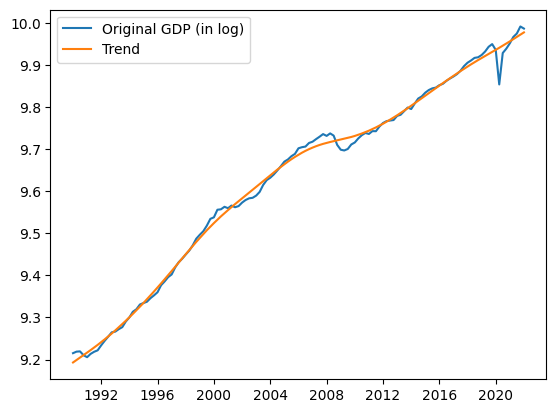

In [2]:
# download the data from FRED using pandas_datareader
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="Original GDP (in log)")

# Plot the trend component
plt.plot(trend, label="Trend")

# Add a legend and show the plot
plt.legend()
plt.show()


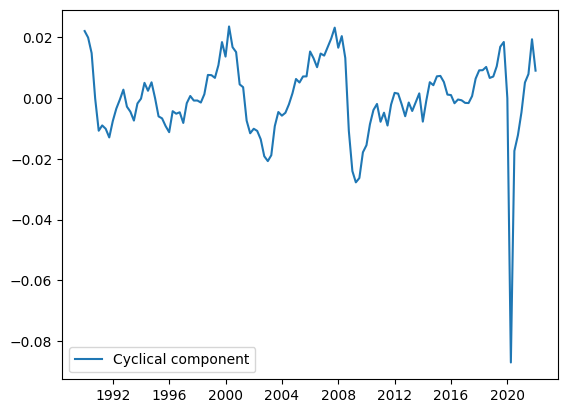

Cycle mean: 3.4286441042036307e-13
Cycle standard deviation: 0.013194355527702654


In [3]:
# Plot the cycle component
plt.plot(cycle, label="Cyclical component")

# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean = cycle.mean()
cycle_std = cycle.std()

print("Cycle mean:", cycle_mean)
print("Cycle standard deviation:", cycle_std)


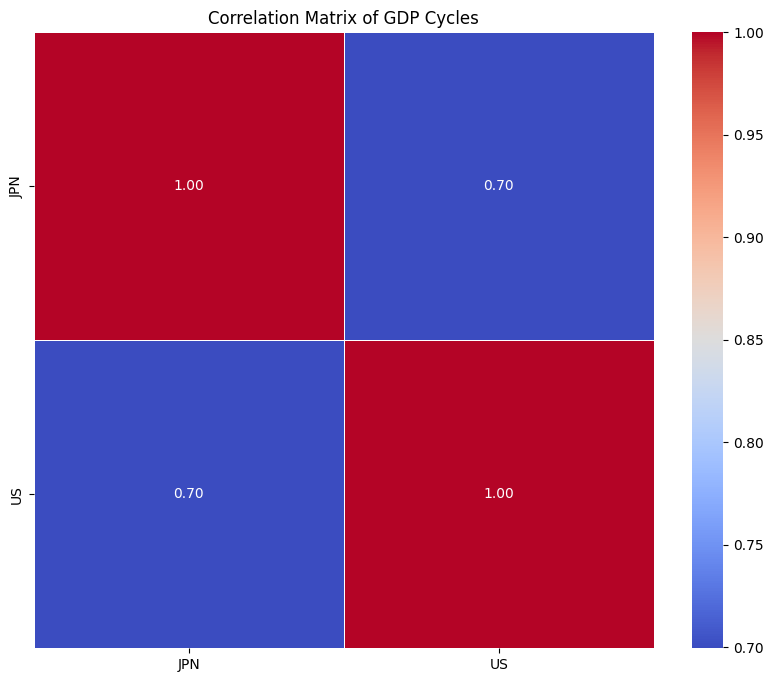

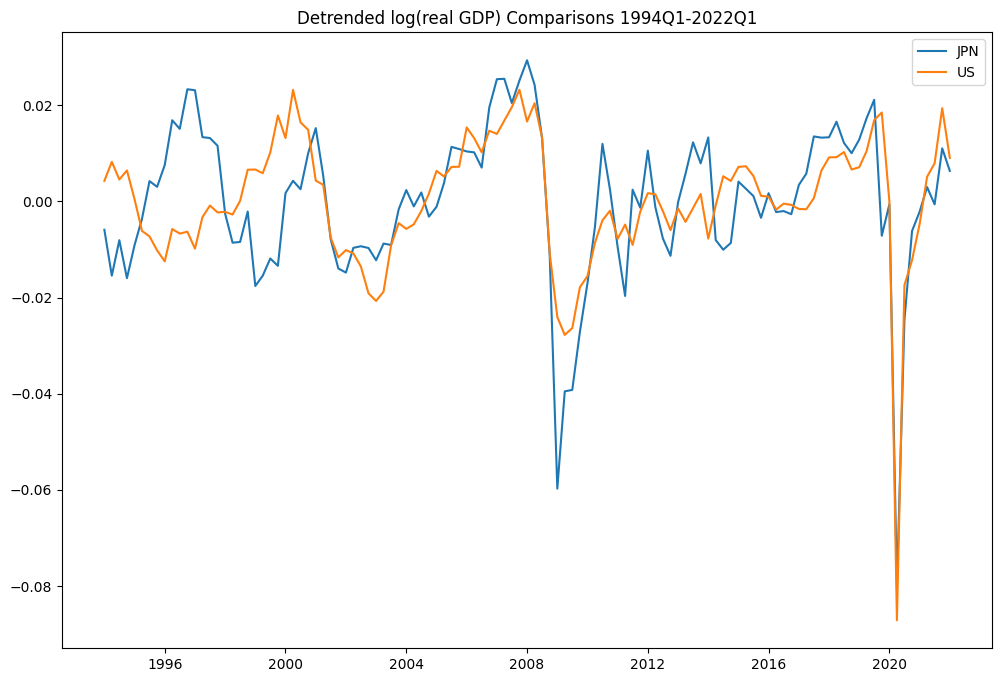

In [3]:
# Set the start and end dates for the data
start_date = '1994-01-01'
end_date = '2022-01-01'

# Dictionary of GDP data sources
key_list = {
    "JPN": "JPNRGDPEXP",  # Japan's real GDP (quarterly, seasonally adjusted)
    #"GER": "DEURGDPR",    # Germany's real GDP (quarterly, seasonally adjusted)
    "US": "GDPC1",        # US real GDP (quarterly, chain-weighted)
    #"UK": "CLVMNACSCAB1GQUK",  # UK's real GDP (quarterly, chain-weighted)
    #"FRA": "CLVMNACSCAB1GQFR",  # France's real GDP (quarterly, chain-weighted)
    #"IND": "INDPRO",          # India's industrial production index (monthly)
    #"BRA": "BRAGDPNQDSMEI",   # Brazil's real GDP (quarterly, seasonally adjusted)
    #"SWE": "SWERGDPR"         # Sweden's real GDP (quarterly, seasonally adjusted)
}

# Function to apply the HP filter and return the cycle
def get_gdp_cycle(ticker):
    # Download the data from FRED using pandas_datareader
    gdp = web.DataReader(ticker, 'fred', start_date, end_date)
    log_gdp = np.log(gdp)
    # Apply a Hodrick-Prescott filter to the data to extract the cyclical component
    cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)
    return cycle

# Fetch cycles and store them in a dictionary
gdp_cycles = {country: get_gdp_cycle(ticker) for country, ticker in key_list.items()}

# Create DataFrame from the cycles dictionary
cycle_df = pd.DataFrame({k: v.squeeze() for k, v in gdp_cycles.items()})

# Calculate standard deviations
std_devs = cycle_df.std()

# Create correlation matrix
correlation_matrix = cycle_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of GDP Cycles')
plt.show()

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Loop through each country in the key list and plot their GDP cycles
for country_code, ticker in key_list.items():
    cycle = get_gdp_cycle(ticker)
    plt.plot(cycle, label=country_code)

# Add title, legend, and show plot
plt.title('Detrended log(real GDP) Comparisons 1994Q1-2022Q1')
plt.legend()
plt.show()